This assignment provides an opportunity to build an ANN model using the a bank marketing dataset

https://www.kaggle.com/sriharipramod/bank-loan-classification

Target variable - personal loan - reflects whether a customer accepted a personal loan offer.

Load the data and perform EDA.

1. Evaluate missing values.
2. Assess target class distribution.
3. Pre-process data as needed.
4. Assess information value of individual features (correlation analysis and pairlot).

5 pts.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
bank_loans=pd.read_csv('UniversalBank.csv')

In [ ]:
bank_loans.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
bank_data=bank_loans.drop('ID',axis=1)


In [ ]:
bank_data=bank_loans.drop('ZIP Code',axis=1)

The ID column has been removed because the ID is not necessary to this classification model. This has no predictive value and including an ID column would make it more difficult to interpret the model since an ID is unique to a specific individual.  

I decided to remove the Zipcode because although it is labeled as an integer, it is categorical, so it would have to be converted into an object data type in order to be used corrctly. However, if converted to an object, then we would have to dummy code. Once I dummy coded, I realized that there were so many columns created, so I decided to remove the Zip Code since it's a categorical data.

In [ ]:
bank_data.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


On the data info, we can see that Zipcode is treated as an integer. However, although the zipcode is an integer it is a categorical data

<Axes: >

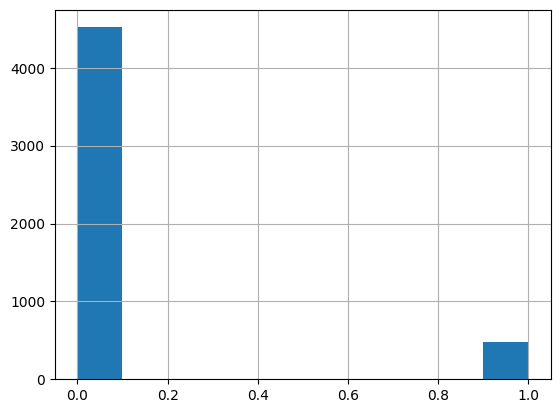

In [ ]:
bank_data['Personal Loan'].hist()

There's a lot more data on individuals that have not taken out a personal loan, making the dataset unbalanced since there's more data for one side.

In [ ]:
bank_data['Personal Loan'].mean()

0.096

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
bank_data.corr()['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal Loan, dtype: float64

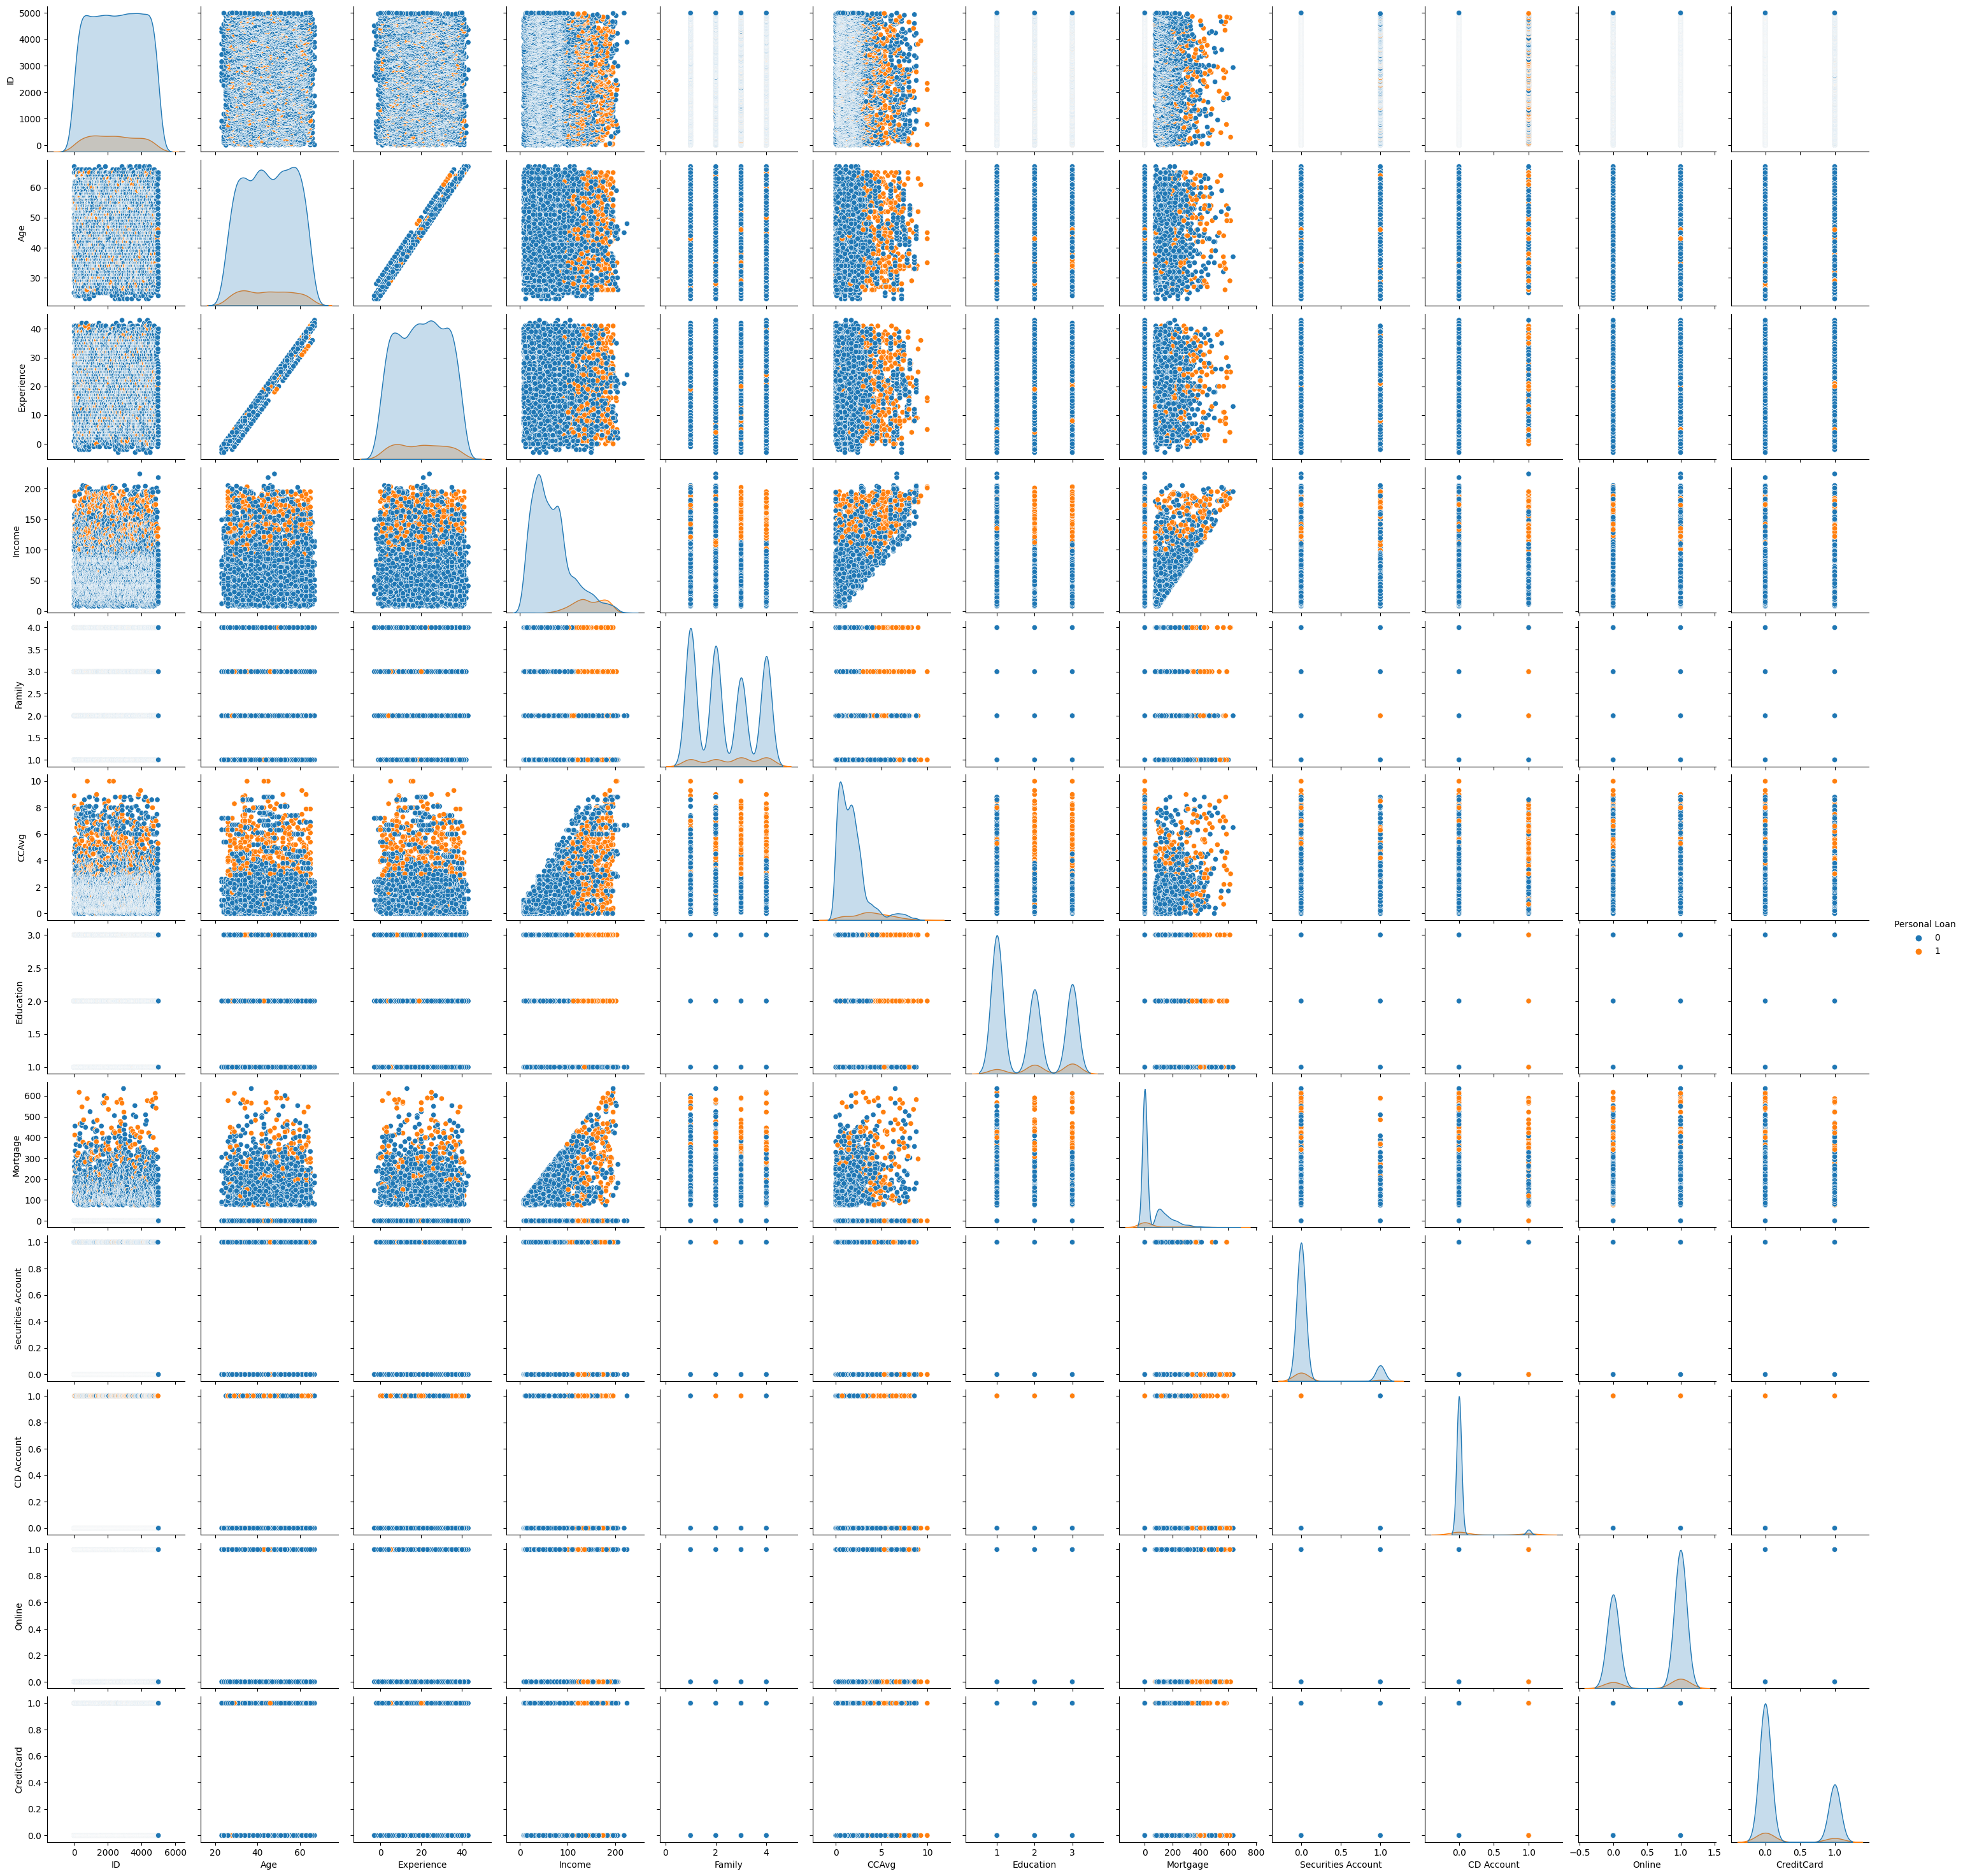

In [ ]:
sns.pairplot(bank_data ,hue='Personal Loan')

5. Split the data 70/30 into training and test datasets.
6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes.
7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values.

10 pts.

In [ ]:
X = bank_data.drop('Personal Loan',axis=1).values
y = bank_data['Personal Loan'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='relu', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[1348    3]
 [  45  104]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.97      0.70      0.81       149

    accuracy                           0.97      1500
   macro avg       0.97      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Precision: 0.97 Out of all the individuals that the model predicted would accept a personal loan offer, 97% of them did

Recall: 0.7 Out of all the individuals that accepted the personal loan, the model on predicted this outcome for 70% of those individuals

F1-score: The F1 score of 0.81 suggests that the model is performing decent in identifying the individulas who accepted a personal loan.

In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred_mlpc))

ROC AUC:  0.8478829999155484


The ROC of 0.84 is considered good since it is greater than 0.5. Therefore, the ROC of 0.84 indicates that the model has relatively high discriminatory ability as it is able to distinguish between two classes quite well.

8. Assess the effect of the number of hidden nodes (5-30) on model accuracy.
9. Identify optimal number of nodes.

5 pts.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='relu', solver='adam', random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

<Axes: >

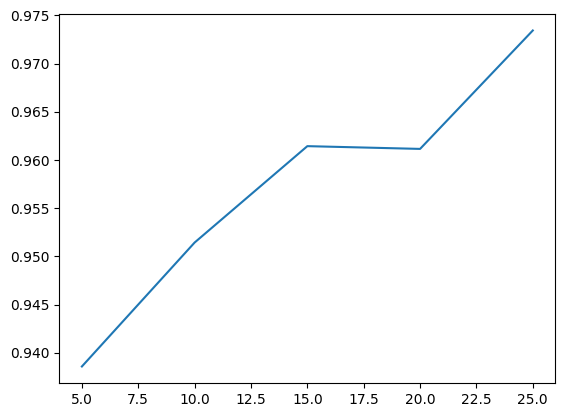

In [ ]:
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,5), y=cv_scores)

In [ ]:
print('Optimal hidden layer size (accuracy): ', (cv_scores.index(max(cv_scores))+1)*5)

Optimal hidden layer size (accuracy):  25


In order to optimize the model we had to add 5 since that was the minimum nodes that we had wanted

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=5, activation='relu', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[1334   17]
 [  78   71]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1351
           1       0.81      0.48      0.60       149

    accuracy                           0.94      1500
   macro avg       0.88      0.73      0.78      1500
weighted avg       0.93      0.94      0.93      1500



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Precision: 0.81 Out of all the individuals that the model predicted would accept a personal loan offer, 81% of them did

Recall: 0.48 Out of all the individuals that accepted the personal loan, the model on predicted this outcome for 48% of those individuals

F1-score: The F1 score of 0.60 suggests that the model has a moderate performance in identifying the individulas who accepted a personal loan.



In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=25, activation='relu', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[1348    3]
 [  39  110]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.97      0.74      0.84       149

    accuracy                           0.97      1500
   macro avg       0.97      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


After optimizing the model, we get the model with the best performance

Precision: 0.97 Out of all the individuals that the model predicted would accept a personal loan offer, 97% of them did

Recall: 0.74 Out of all the individuals that accepted the personal loan, the model on predicted this outcome for 74% of those individuals

F1-score: The F1 score of 0.84 suggests that the model is performing decent in identifying the individulas who accepted a personal loan.



ANN with Dropout


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
28/28 [==============================] - 2s 14ms/step - loss: 0.7721 - val_loss: 0.6137
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5592 - val_loss: 0.4510
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 0.4587 - val_loss: 0.3799
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4181 - val_loss: 0.3555
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4039 - val_loss: 0.3401
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3773 - val_loss: 0.3273
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3640 - val_loss: 0.3155
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3413 - val_loss: 0.3036
Epoch 9/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3322 - val_loss: 0.2929
Epoch 10/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3179 - val_loss: 0.2833
Epoch 11

<Axes: >

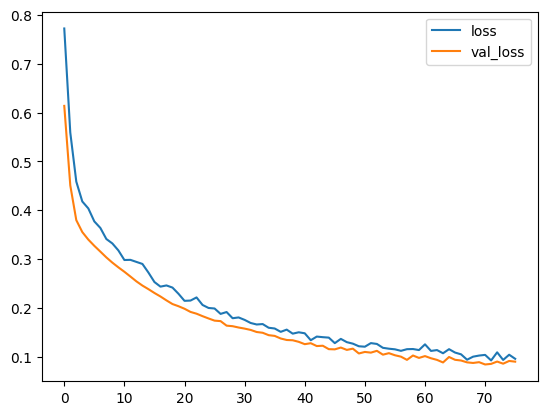

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
y_pred = model.predict(X_test)

47/47 [==============================] - 0s 3ms/step


In [ ]:
y_pred = (y_pred >= 0.5)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.96      0.72      0.82       149

    accuracy                           0.97      1500
   macro avg       0.97      0.86      0.90      1500
weighted avg       0.97      0.97      0.97      1500



Precision: 0.96 Out of all the individuals that the model predicted would accept a personal loan offer, 96% of them did

Recall: 0.72 Out of all the individuals that accepted the personal loan, the model on predicted this outcome for 72% of those individuals

F1-score: The F1 score of 0.82 suggests that the model is performing decent in identifying the individulas who accepted a personal loan.



In [ ]:
print(confusion_matrix(y_test,y_pred))
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

[[1347    4]
 [  42  107]]
47/47 [==============================] - 0s 3ms/step
ROC AUC:  0.9855637633569962
